In [1]:
import numpy as np
from matplotlib import pyplot as plt
import struct
from scipy.signal import filtfilt, butter
import pandas as pd

In [2]:
data_path = r'data/FirstExp-minusfivetofive-420REALREAL-FORREALTHISTIME2025-01-08T16_23_39.bin'
unpacked_data = np.fromfile(data_path, dtype=np.float64)
unpacked_data = unpacked_data.reshape(-1, 2)

EPhys = unpacked_data[:, 0]
TTL = unpacked_data[:, 1]

In [3]:
fs = 25000 # sampling frequency of 25kHz
cutoff = 200  # 200
order = 4
b, a = butter(order, cutoff / (fs/2), btype='low') # fs/2 is the Nyquist frequency; need to normalize cutoff frequency between 0 and 1
filtered_TTL = filtfilt(b, a, TTL)

df = pd.DataFrame({
    'EPhys': unpacked_data[:, 0],
    'TTL': unpacked_data[:, 1],
    'Filtered_TTL': filtered_TTL
})
df.head()

,EPhys,TTL,Filtered_TTL
0,0.064549,0.027836,0.028927
1,0.090312,0.037175,0.028672
2,0.127991,0.026226,0.028420
3,0.122838,0.017531,0.028170
4,0.128313,0.016565,0.027922


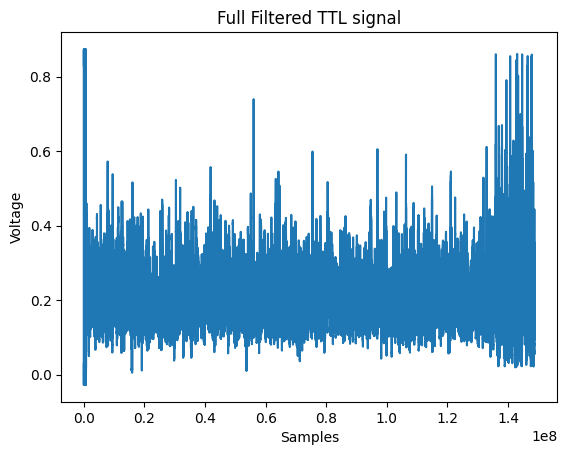

In [ ]:
plt.figure()
time = np.arange(len(filtered_TTL))
plt.plot(time, filtered_TTL)
plt.title('Full Filtered TTL signal')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()

In [6]:
length = len(TTL)
time = length / fs
print(time)

5951.4


In [ ]:
# show only first 4 to 8 minutes
start_index = 4 * fs * 60
end_index = 8 * fs * 60

plt.figure()
time_segment = np.arange(len(filtered_TTL[-500000:])) / 25000  # Convert to seconds
plt.plot(time, filtered_TTL[-500000:])
plt.plot(time, EPhys[-500000:])
plt.title('Last 20 seconds of filtered TTL')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.show()


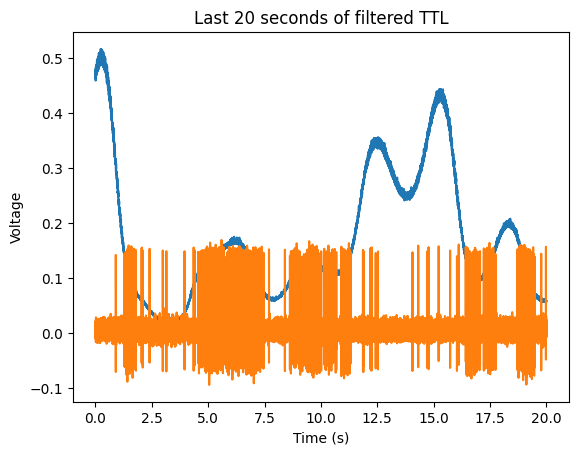

In [ ]:
# Full data 148785000
#250000*2 = 500000 samples = 20 seconds at 25kHz
plt.figure()
time = np.arange(len(filtered_TTL[-500000:])) / 25000  # Convert to seconds
plt.plot(time, filtered_TTL[-500000:])
plt.plot(time, EPhys[-500000:])
plt.title('Last 20 seconds of filtered TTL')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.show()

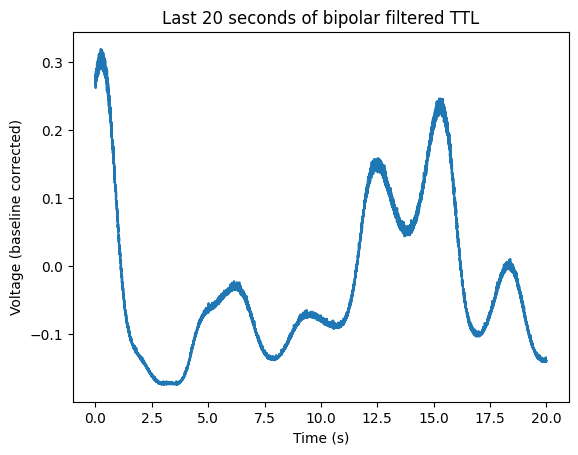

In [ ]:
# find the 0 of the velocity

baseline = np.median(filtered_TTL)  # or np.mean(filtered_TTL)
bipolar_signal = filtered_TTL - baseline
plt.figure()
plt.plot(time, bipolar_signal[-500000:])
plt.title('Last 20 seconds of bipolar filtered TTL')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (baseline corrected)')
plt.show()

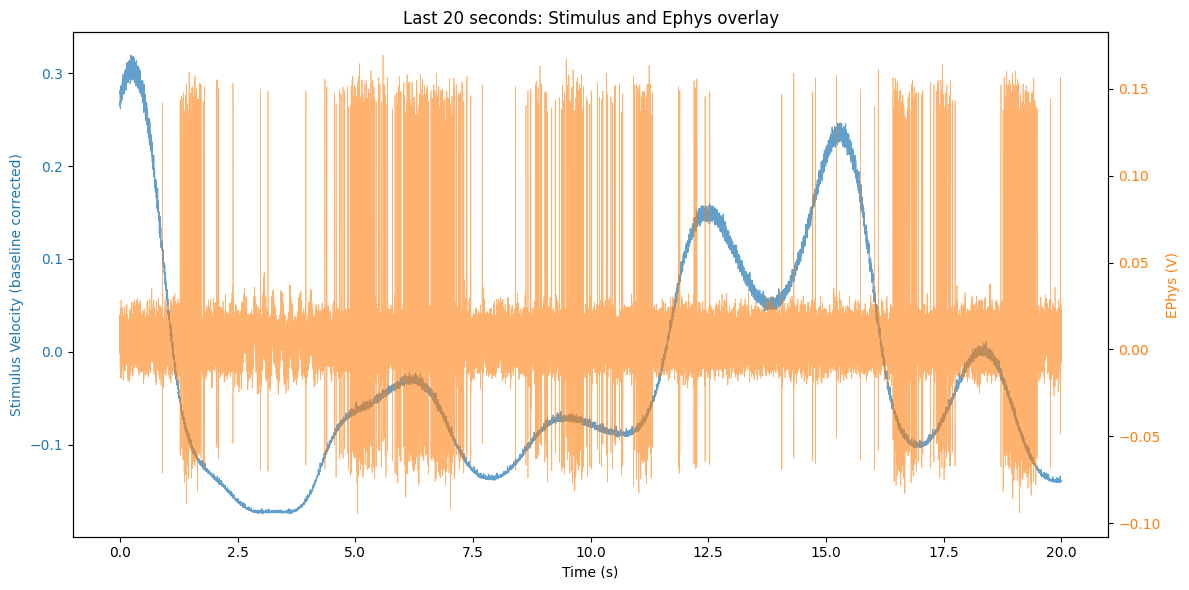

In [ ]:
# find the 0 of the velocity

baseline = np.median(filtered_TTL)  # or np.mean(filtered_TTL)
bipolar_signal = filtered_TTL - baseline

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stimulus on first y-axis
color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Stimulus Velocity (baseline corrected)', color=color)
ax1.plot(time, bipolar_signal[-500000:], color=color, alpha=0.7, linewidth=0.8)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for ephys
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('EPhys (V)', color=color)
ax2.plot(time, EPhys[-500000:], color=color, alpha=0.6, linewidth=0.5)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Last 20 seconds: Stimulus and Ephys overlay')
fig.tight_layout()
plt.show()